In [41]:
import pandas as pd
import numpy as np
import time
import operator
import random

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

Add some classification algorithms for feature extraction and feature extraction methods

In [44]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors

Adding clustering algorithms

In [45]:
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering

In [46]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score

In [47]:
df = pd.read_csv(r'diabetes.csv')

In [48]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
df.shape

(768, 9)

In [50]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [51]:
vars = df.columns[:-1]

In [52]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


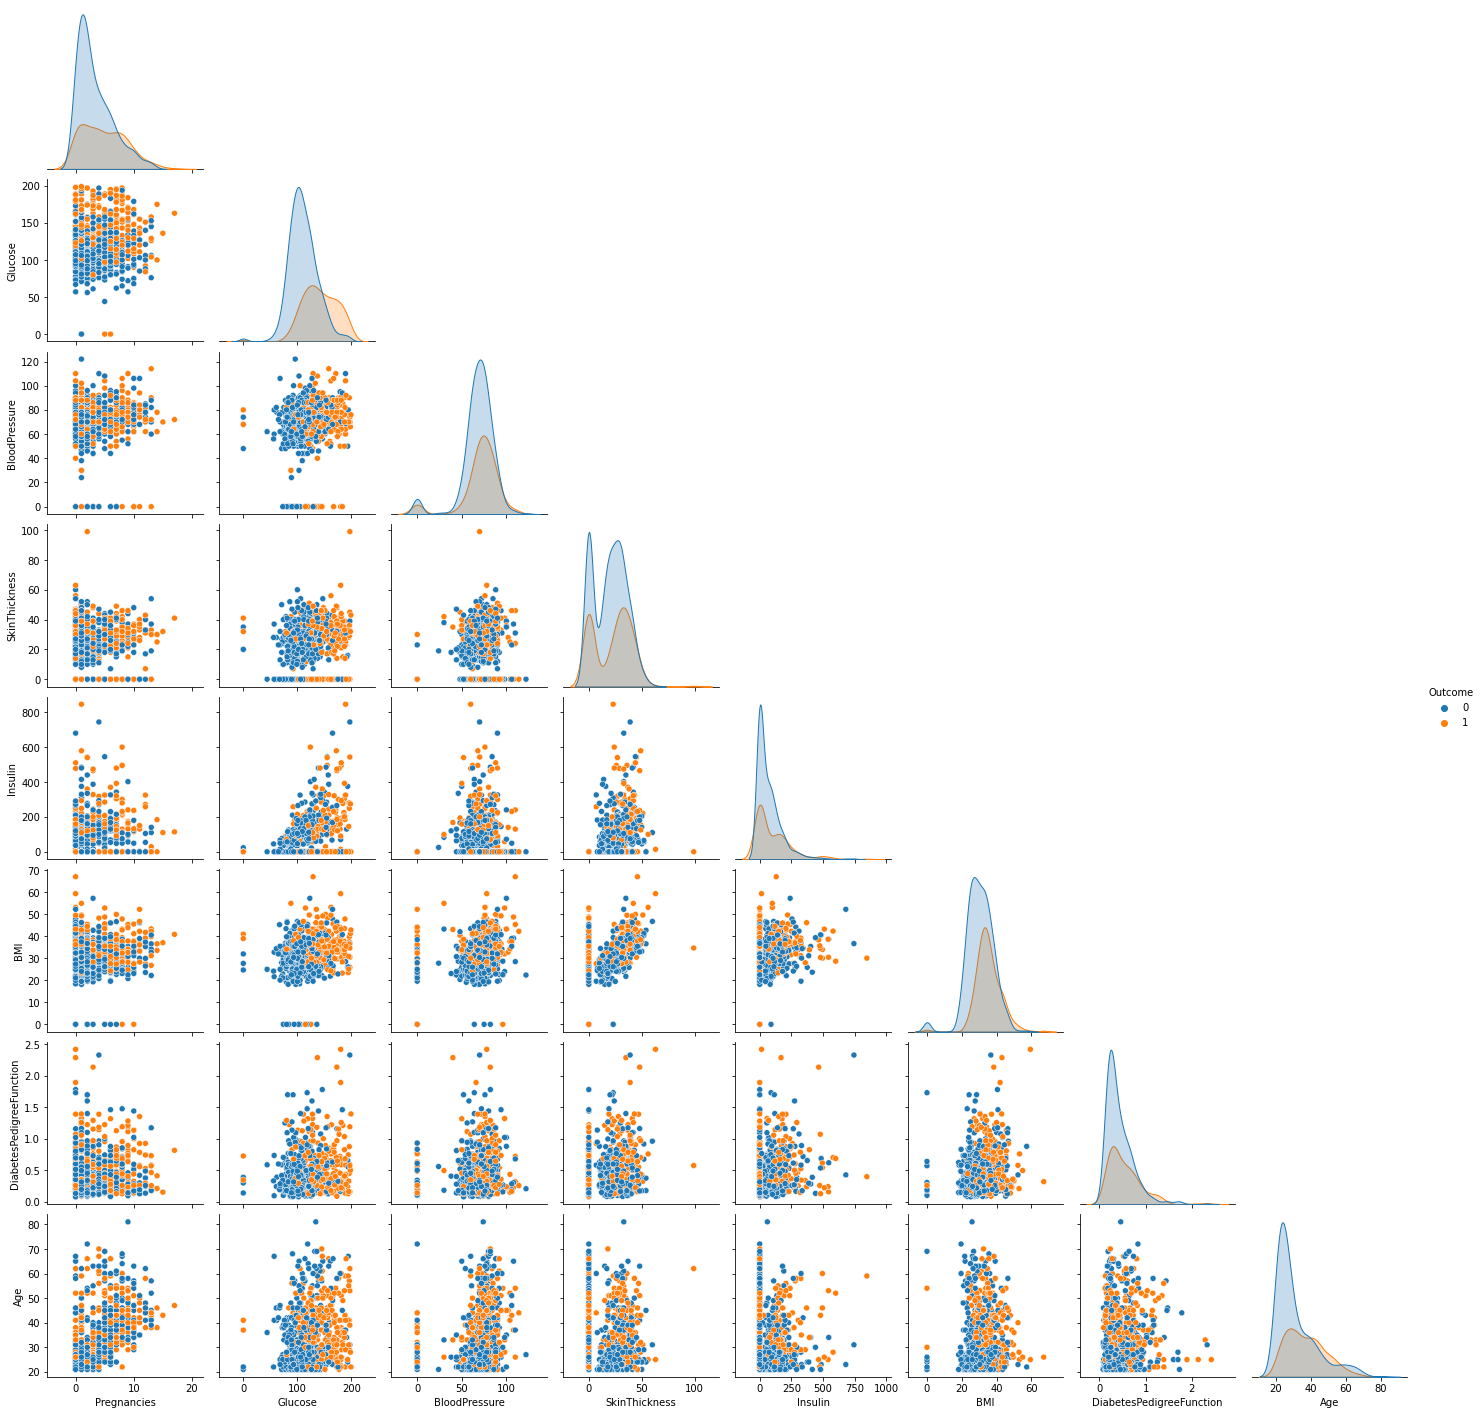

In [53]:
sns.pairplot(df, vars=vars, hue='Outcome',corner=True)

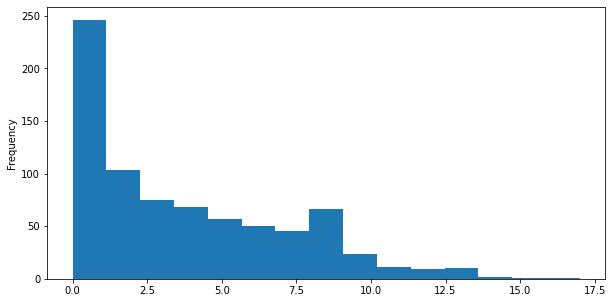

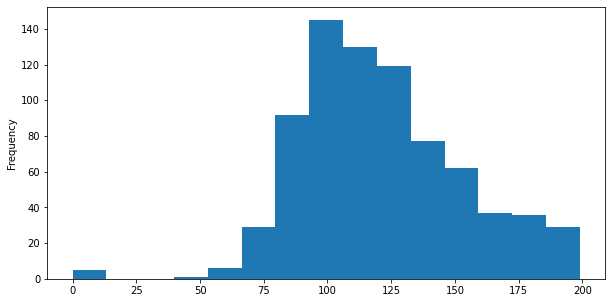

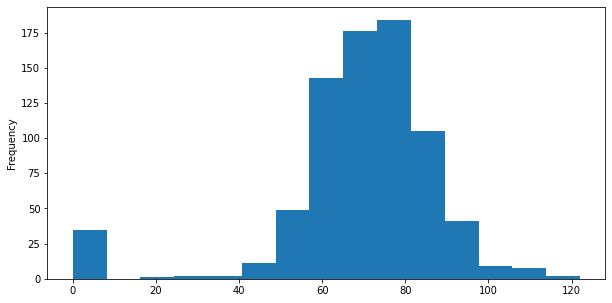

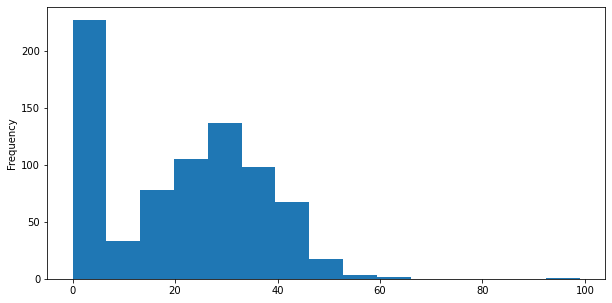

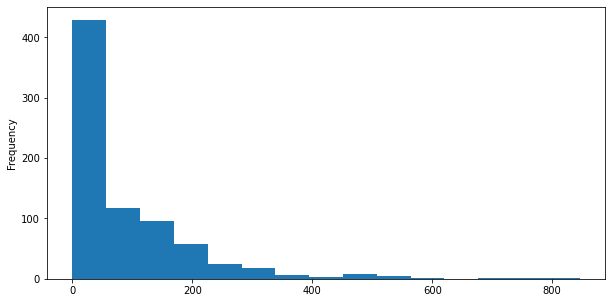

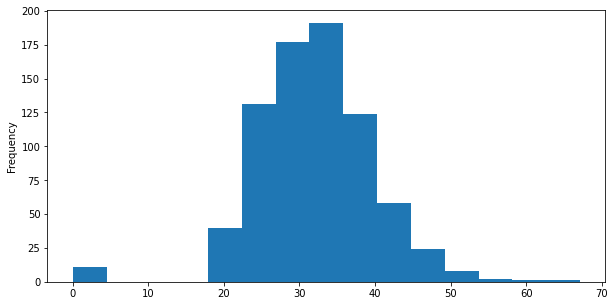

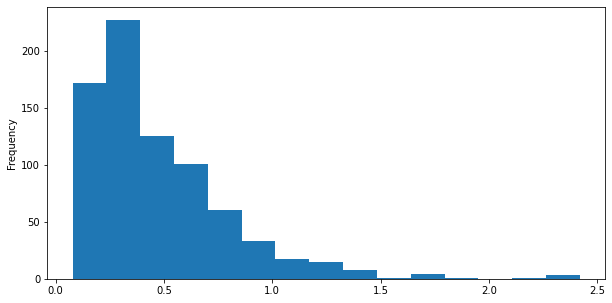

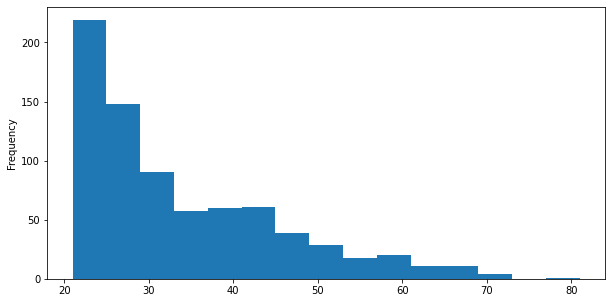

In [54]:
for var in vars:
    plt.figure(figsize=(10,5))
    df[var].plot.hist(bins=15)

/home/azamat/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/azamat/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/azamat/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/azamat/.lo

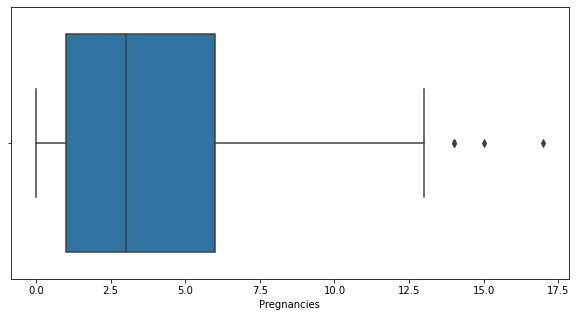

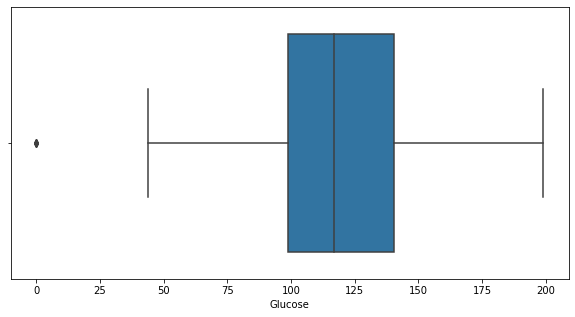

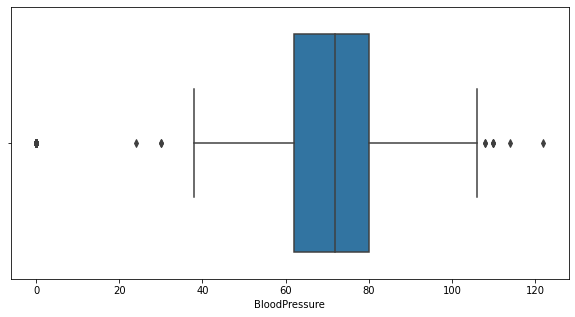

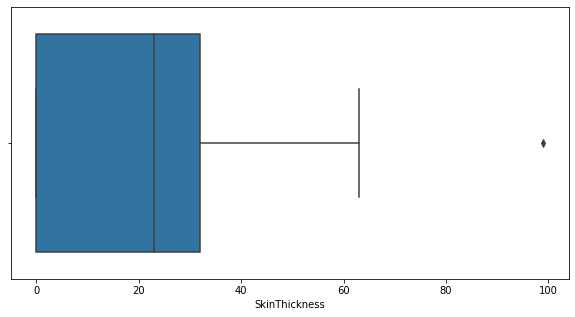

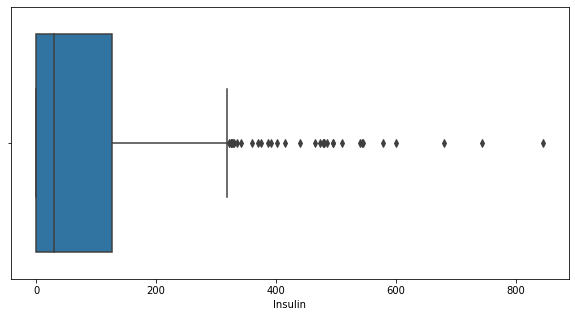

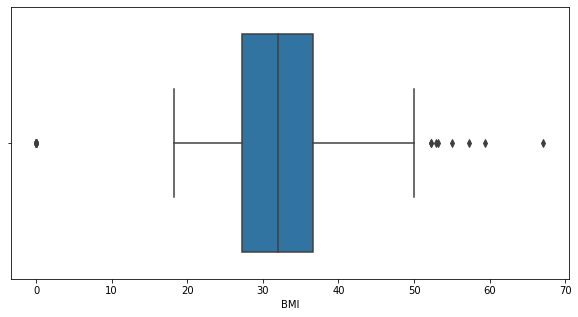

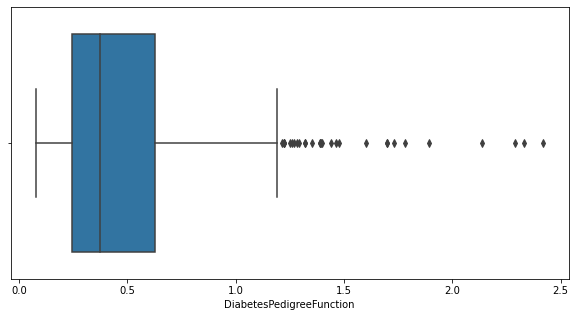

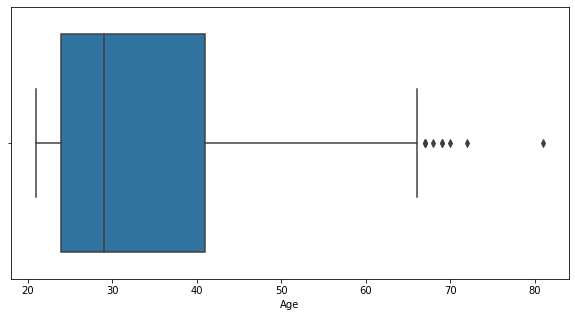

In [55]:
for var in vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[var])

In [56]:
def remove_outliers(df, target):
    perc = np.percentile(df[target], [0, 25, 50, 75, 100])
    iqr = perc[3] - perc[1]
    min_ = perc[1] - 1.5*iqr
    max_ = perc[3] + 1.5*iqr
    min_bound = df.loc[(df[target] < min_), target].index
    max_bound = df.loc[(df[target] > max_), target].index
    if len(min_bound) == 0:
        pass
    else:
        df.loc[min_bound, target] = min_
    if len(max_bound) == 0:
        pass
    else:
        df.loc[max_bound, target] = max_
    return df

In [57]:
for var in vars:
    df = remove_outliers(df, var)

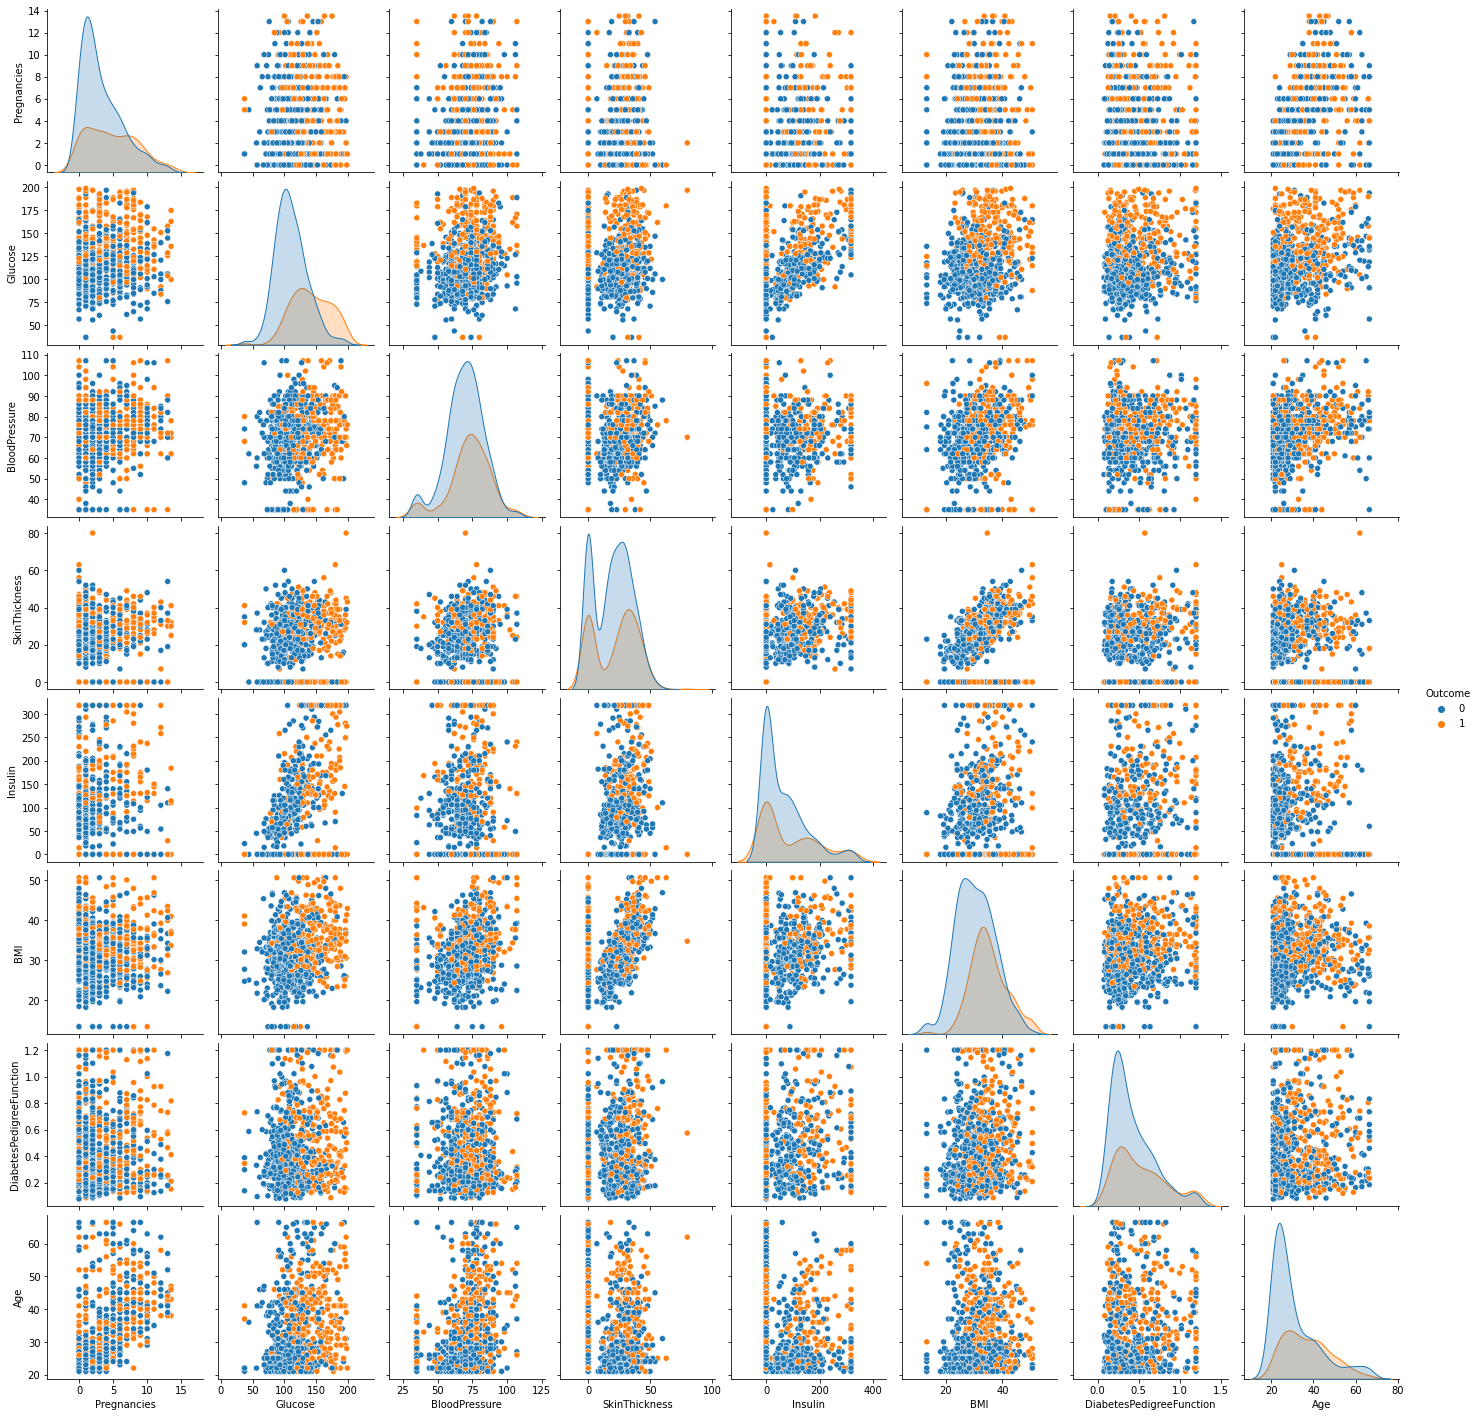

In [58]:
sns.pairplot(df,
vars=vars,
hue='Outcome')

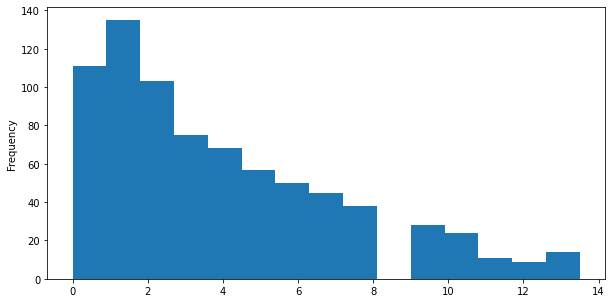

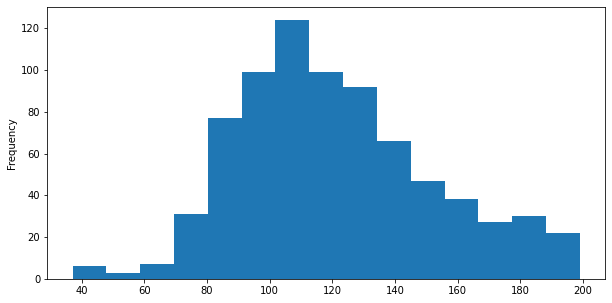

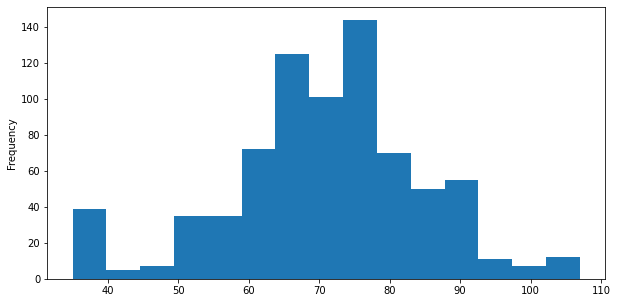

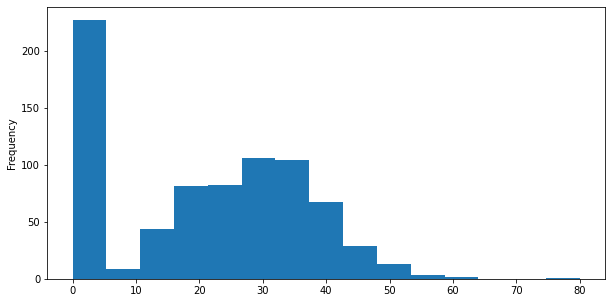

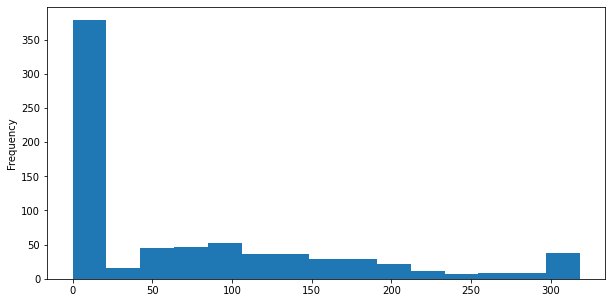

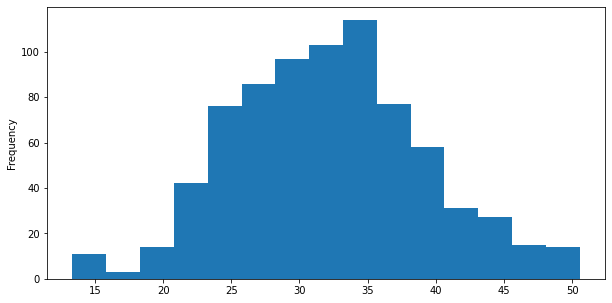

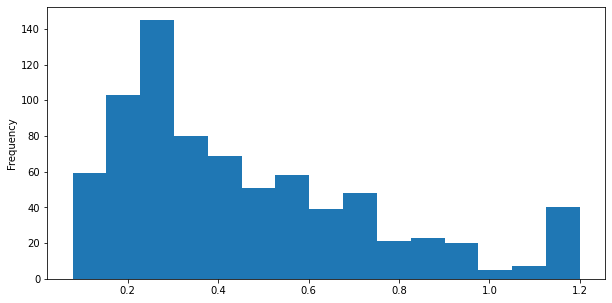

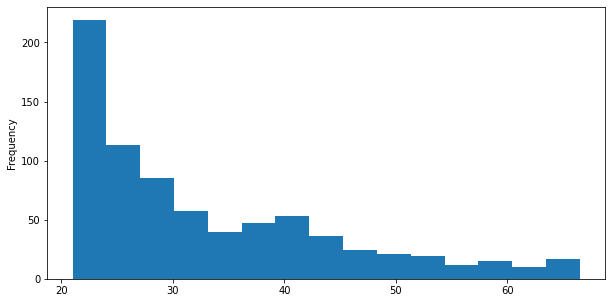

In [59]:
for var in vars:
    plt.figure(figsize=(10, 5))
    df[var].plot.hist(bins=15)

/home/azamat/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/azamat/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/azamat/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/azamat/.lo

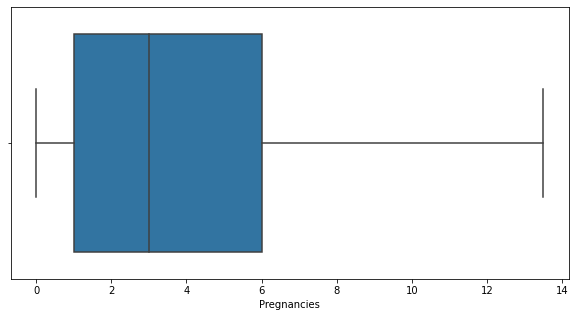

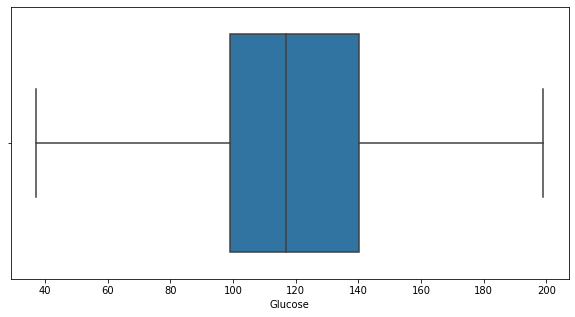

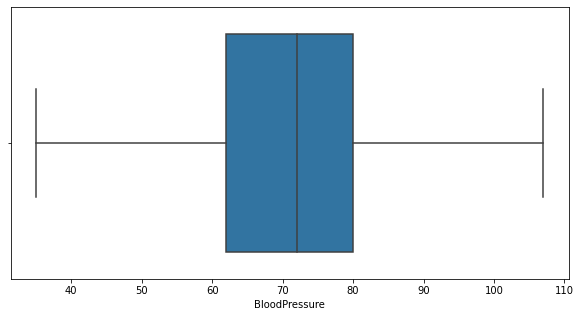

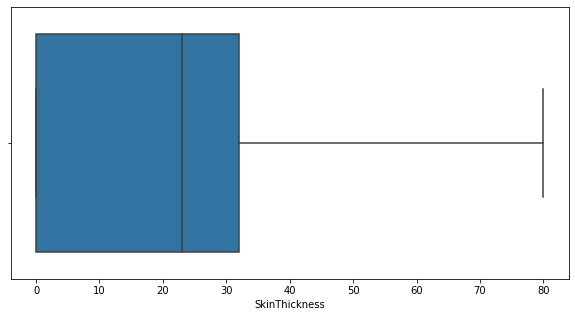

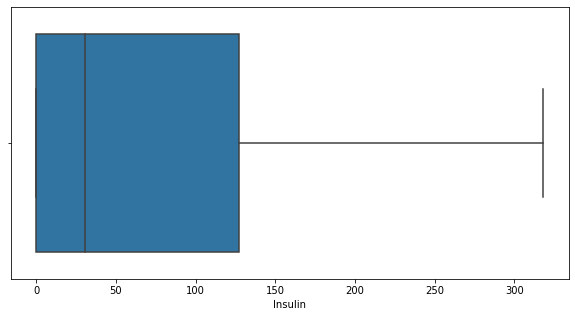

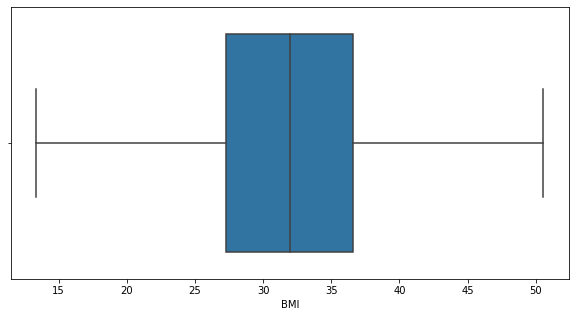

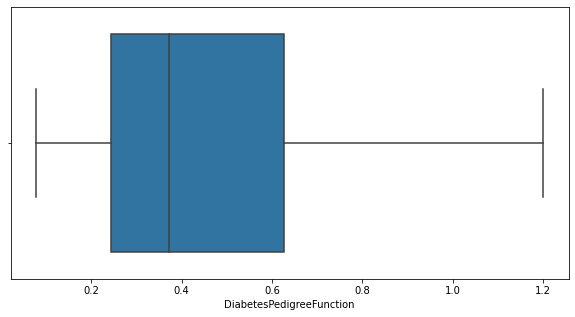

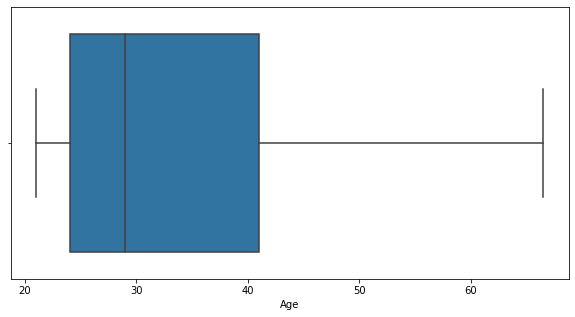

In [60]:
for var in vars:
    plt.figure(figsize=(10, 5))
    sns.boxplot(df[var])

In [61]:
def model_score(x, y, ml, trained):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
    if trained == 'no':
        ml.fit(x_train, y_train)
    y_pred = ml.predict(x_test)
    sc = accuracy_score(y_pred, y_test)
    return sc

In [62]:
def dbscan_plot(x, y, cluster, x_axis, y_axis):
    db = cluster
    db.fit(x)
    core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
    core_samples_mask[db.core_sample_indices_] = True
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise_ = list(labels).count(-1)
    unique_labels = set(labels)
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    print("Homogeneity: %0.3f" % homogeneity_score(y, labels))
    print("Completeness: %0.3f" % completeness_score(y, labels))
    print(f"Noise count {n_noise_}")
    for k, col in zip(unique_labels, colors):
        if k == -1:
            # Black used for noise.
            col = [0, 0, 0, 1]

        class_member_mask = labels == k

        xy = x[class_member_mask & core_samples_mask]
        plt.plot(
            xy[:, x_axis],
            xy[:, y_axis],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=14,
        )

        xy = x[class_member_mask & ~core_samples_mask]
        plt.plot(
            xy[:, x_axis],
            xy[:, y_axis],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6,
        )

    plt.title("Estimated number of clusters: %d" % n_clusters_)
    plt.show()

In [63]:
def cluster(x, y, cluster ,x_axis, y_axis):
    y_pred = cluster.fit_predict(x)
    score = accuracy_score(y, y_pred)
    score = score*100
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_pred, y)
    sns.heatmap(cm, annot=True)
    plt.title(f'Accuracy_score: {round(score, 2)}%')
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,5))
    for i, j in enumerate(np.unique(y_pred)):
        axes[0].scatter(x[y_pred==j, x_axis], x[y_pred==j, y_axis])
    for i, j in enumerate(np.unique(y)):
        axes[1].scatter(x[y==j, x_axis], x[y==j, y_axis])
    axes[0].set_title(f'Predicted using\n{cluster}')
    axes[1].set_title(f'Observed values')
    plt.tight_layout()
    plt.show()

In [64]:
def classifier(x, y, ml, x_axis, y_axis):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)
    y_pred = ml.predict(x_test)
    sc = accuracy_score(y_pred, y_test)
    score = f'Score is :{round(sc*100, 2)}%'
    print(score)
    cm = confusion_matrix(y_pred, y_test)
    sns.heatmap(cm, annot=True)
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    for i, j in enumerate(np.unique(y_pred)):
        axes[0].scatter(x_test[y_pred==j, x_axis], x_test[y_pred==j, y_axis])
    for n, p in enumerate(np.unique(y_test)):
        axes[1].scatter(x_test[y_test==p, x_axis], x_test[y_test==p, y_axis])
    axes[0].set_title('Predicted')
    axes[1].set_title('Not Predicted')
    plt.tight_layout()
    plt.show()

In [65]:
df_ml = df.copy()

In [66]:
df_ml.drop(['Pregnancies'], axis=1, inplace=True)

In [67]:
ss = StandardScaler()
ss.fit(df[vars[1:]])
df_ml[vars[1:]] = ss.transform(df[vars[1:]])

In [68]:
x = df_ml.drop(['Outcome'], axis=1)
y = df_ml['Outcome']

In [69]:
nn_cl = NearestNeighbors(algorithm='auto', n_neighbors=5)
nn_cl.fit(x)
distances, indices = nn_cl.kneighbors(x)


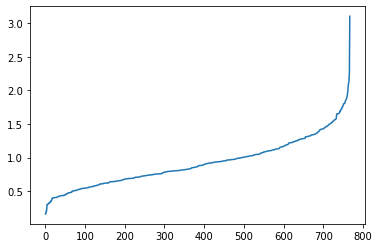

In [70]:
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

In [71]:
epss = np.arange(1, 2.1, 0.01)
best_clusters = []
for eps in epss:
    db = DBSCAN(eps=eps, min_samples=5, metric='euclidean', algorithm='kd_tree')
    db.fit(x)
    labels = db.labels_
    labels = db.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    if n_clusters_ == 2:
        best_clusters.append(eps)

In [72]:
best_clusters

[1.3200000000000003,
 1.3300000000000003,
 1.3400000000000003,
 1.3500000000000003,
 1.3600000000000003,
 1.4000000000000004,
 1.4100000000000004,
 1.4800000000000004,
 1.4900000000000004,
 1.5000000000000004,
 1.5100000000000005,
 1.5200000000000005,
 1.5900000000000005,
 1.6000000000000005,
 1.6100000000000005,
 1.6200000000000006,
 1.6300000000000006]

In [73]:
epss = best_clusters
min_samples = range(5, 15)
metrics = ['euclidean', 'l1', 'l2', 'manhattan']
algorithms = ['kd_tree', 'ball_tree', 'auto', 'brute']
params_db = dict()
for algorithm in algorithms:
    for metric in metrics:
        for min_sample in min_samples:
            for eps in epss:
                db = DBSCAN(eps=eps, min_samples=min_sample, algorithm=algorithm, metric=metric)
                y_pred = db.fit_predict(x)
                sc = accuracy_score(y_pred, y)
                name = f'{algorithm} {metric} {min_sample} {eps}'
                params_db[name] = sc

In [74]:
max(params_db.items(), key=operator.itemgetter(1))

('kd_tree euclidean 5 1.5900000000000005', 0.6328125)

Homogeneity: 0.034
Completeness: 0.074
Noise count 55


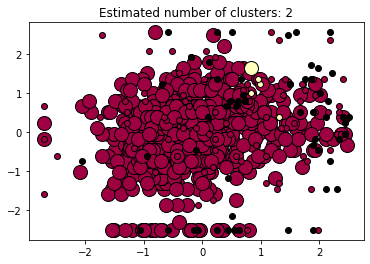

In [75]:
db = DBSCAN(eps=1.5900000000000005, min_samples=5, metric='euclidean', algorithm='kd_tree')
dbscan_plot(x.values, y.values, db, 0, 1)

In [77]:
preds = db.fit_predict(x)

In [83]:
df['clustered'] = preds

In [84]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,aggression,clustered
0,6.0,148.0,72,35,0.0,33.6,0.627,50.0,1,0,0
1,1.0,85.0,66,29,0.0,26.6,0.351,31.0,0,0,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32.0,1,-1,-1
3,1.0,89.0,66,23,94.0,28.1,0.167,21.0,0,0,0
4,0.0,137.0,40,35,168.0,43.1,1.200,33.0,1,-1,-1


/home/azamat/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='clustered', ylabel='count'>

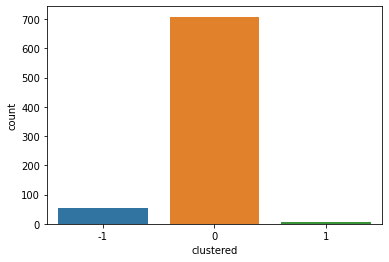

In [85]:
sns.countplot(df['clustered'])

([<matplotlib.patches.Wedge at 0x7fadec4a01c0>,
 [Text(-1.1640375038334527, 0.2915762158839169, '0'),
  Text(1.157830824766925, -0.3153217106695046, '-1'),
  Text(1.2997280964431055, -0.0265871268921951, '1')],
 [Text(-0.6790218772361808, 0.17008612593228484, '92%'),
  Text(0.6754013144473727, -0.183937664557211, '7%'),
  Text(0.7998326747342186, -0.016361308856735444, '1%')])

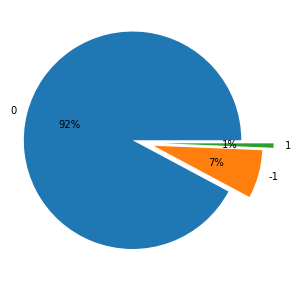

In [91]:
plt.figure(figsize=(10, 5))
plt.pie(df['clustered'].value_counts(), 
explode=[0.1, 0.1, 0.2],
autopct='%1.0f%%',
labels=df['clustered'].value_counts().index
)

In [93]:
df['clustered'].value_counts()

 0    708
-1     55
 1      5
Name: clustered, dtype: int64

In [94]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64